## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, num_class=10, l2_regulization=True, ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.models.Input(input_shape)
    regulization = l2(ratio)
    if l2_regulization == False: 
        regulization = l1(ratio)
        
    x = keras.layers.Dense(units=512, activation='relu', name="hidden_layer1", kernel_regularizer=regulization)(input_layer)
    x = keras.layers.Dense(units=256, activation='relu', name="hidden_layer2", kernel_regularizer=regulization)(x)
    x = keras.layers.Dense(units=128, activation='relu', name="hidden_layer3", kernel_regularizer=regulization)(x)
    out = keras.layers.Dense(units=num_class, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
# L1 
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:], l2_regulization=False, ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us

50000/50000 [==============================] - 3s 64us/step - loss: 2.4626 - accuracy: 0.0976 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.4626 - accuracy: 0.0998 - val_loss: 2.4625 - val_accuracy: 0.1000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)

50000/50000 [==============================] - 3s 63us/step - loss: 2.7608 - accuracy: 0.6195 - val_loss: 3.0483 - val_accuracy: 0.5226
Epoch 48/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.7263 - accuracy: 0.6190 - val_loss: 3.0503 - val_accuracy: 0.5026
Epoch 49/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.6875 - accuracy: 0.6224 - val_loss: 2.9950 - val_accuracy: 0.5084
Epoch 50/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.6550 - accuracy: 0.6207 - val_loss: 2.9019 - val_accuracy: 0.5294
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_

50000/50000 [==============================] - 3s 63us/step - loss: 0.9408 - accuracy: 0.6688 - val_loss: 1.3977 - val_accuracy: 0.5215
Epoch 46/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9296 - accuracy: 0.6734 - val_loss: 1.3786 - val_accuracy: 0.5261
Epoch 47/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9137 - accuracy: 0.6792 - val_loss: 1.3732 - val_accuracy: 0.5293
Epoch 48/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9023 - accuracy: 0.6850 - val_loss: 1.4394 - val_accuracy: 0.5137
Epoch 49/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.8936 - accuracy: 0.6861 - val_loss: 1.5340 - val_accuracy: 0.4995
Epoch 50/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.8844 - accuracy: 0.6893 - val_loss: 1.4064 - val_accuracy: 0.5332


In [25]:

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
# L2
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:], l2_regulization=True, ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 71us

50000/50000 [==============================] - 3s 62us/step - loss: 1.6179 - accuracy: 0.5207 - val_loss: 1.6690 - val_accuracy: 0.5064
Epoch 50/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6123 - accuracy: 0.5242 - val_loss: 1.6834 - val_accuracy: 0.4947
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)

50000/50000 [==============================] - 3s 62us/step - loss: 1.0458 - accuracy: 0.6813 - val_loss: 1.5441 - val_accuracy: 0.5275
Epoch 48/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.0384 - accuracy: 0.6852 - val_loss: 1.5564 - val_accuracy: 0.5252
Epoch 49/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0180 - accuracy: 0.6937 - val_loss: 1.5080 - val_accuracy: 0.5346
Epoch 50/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.0056 - accuracy: 0.6980 - val_loss: 1.5325 - val_accuracy: 0.5370
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_

50000/50000 [==============================] - 3s 61us/step - loss: 0.9348 - accuracy: 0.6748 - val_loss: 1.3664 - val_accuracy: 0.5315
Epoch 46/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.9206 - accuracy: 0.6798 - val_loss: 1.3549 - val_accuracy: 0.5351
Epoch 47/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.9100 - accuracy: 0.6815 - val_loss: 1.3482 - val_accuracy: 0.5328
Epoch 48/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.8983 - accuracy: 0.6862 - val_loss: 1.3558 - val_accuracy: 0.5336
Epoch 49/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.8901 - accuracy: 0.6895 - val_loss: 1.4081 - val_accuracy: 0.5214
Epoch 50/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.8739 - accuracy: 0.6958 - val_loss: 1.4291 - val_accuracy: 0.5258


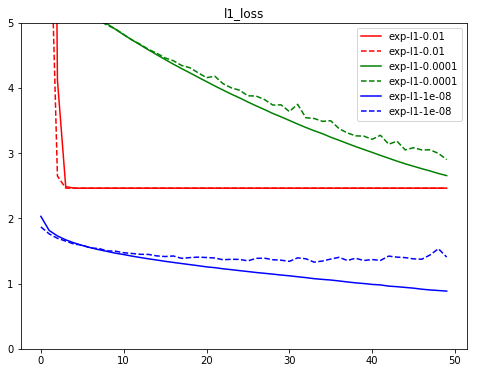

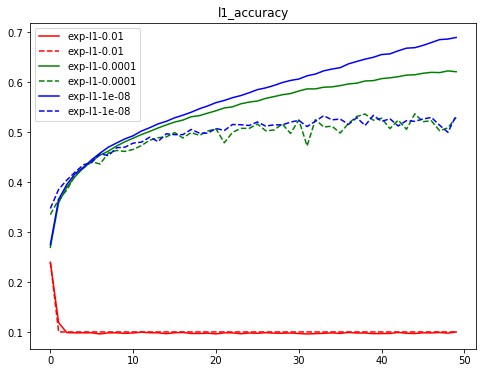

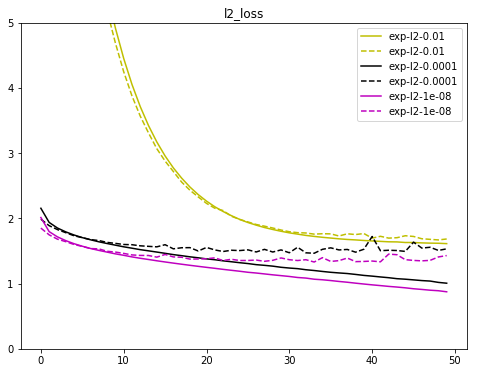

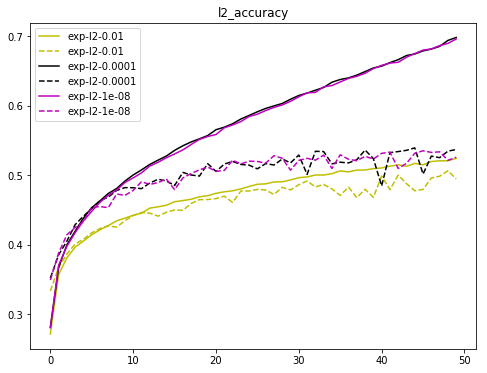

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'k', 'm']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if cond.find('l1') > 0:
        plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('l1_loss')
plt.ylim([0,5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if cond.find('l1') > 0:
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('l1_accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if cond.find('l2') > 0:
        plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('l2_loss')
plt.ylim([0,5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if cond.find('l2') > 0:
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('l2_accuracy')
plt.legend()
plt.show()
